#  CNN for Traffic Sign Identification 
Here, I would go over a simple demonstration on the use of CNNs on a simple traffic sign identification task with the GTSRB - German Traffic Sign Recognition Benchmark (50000 images of 43 classes which are numbered from 0 to 42).

Dataset: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

In [1]:
# !pip3 install tensorflow

In [2]:
# !pip3 install keras

In [3]:
# !pip3 install scikit-learn

In [4]:
# !pip3 install pandas

In [5]:
# !pip3 install Pillow

In [6]:
# !pip3 install matplotlib

In [9]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from keras.utils import to_categorical
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout

2023-05-09 16:21:28.781983: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
# load all the images in a single list in form of an array that will describe the pixels of the image
# load the labels in another list which will be for the corresponding image
imgs_path = "gtsrb-german-traffic-sign/Train"
data = []
labels = []
classes = 43
for i in range(classes):
    img_path = os.path.join(imgs_path, str(i)) #0-42
    for img in os.listdir(img_path):
        im = Image.open(img_path + '/' + img)
        im = im.resize((30,30))
        im = np.array(im)
        data.append(im)
        labels.append(i)
data = np.array(data)
labels = np.array(labels)

In [44]:
print("data shape: ", data.shape)
print("labels shape: ", labels.shape)

data shape:  (39209, 30, 30, 3)
labels shape:  (39209,)


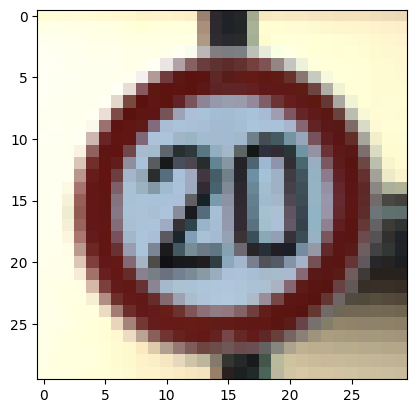

In [11]:
# view an image
path = "gtsrb-german-traffic-sign/Train/0/00000_00004_00029.png"
img = Image.open(path)
img = img.resize((30, 30))
sr = np.array(img) 
plt.imshow(img)
plt.show()

In [12]:
# split dataset into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print("training shape: ",x_train.shape, y_train.shape)
print("testing shape: ",x_test.shape, y_test.shape)
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

training shape:  (31367, 30, 30, 3) (31367,)
testing shape:  (7842, 30, 30, 3) (7842,)


In [15]:
# build the CNN model
model = tf.keras.Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu", input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation="softmax"))

In [16]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
# train
epochs = 15
history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/15
491/491 [==============================] - 57s 112ms/step - loss: 1.9442 - accuracy: 0.5207 - val_loss: 0.4356 - val_accuracy: 0.8938
Epoch 2/15
491/491 [==============================] - 57s 115ms/step - loss: 0.4908 - accuracy: 0.8668 - val_loss: 0.1548 - val_accuracy: 0.9591
Epoch 3/15
491/491 [==============================] - 52s 107ms/step - loss: 0.3145 - accuracy: 0.9132 - val_loss: 0.1032 - val_accuracy: 0.9742
Epoch 4/15
491/491 [==============================] - 50s 101ms/step - loss: 0.2185 - accuracy: 0.9403 - val_loss: 0.0704 - val_accuracy: 0.9838
Epoch 5/15
491/491 [==============================] - 51s 105ms/step - loss: 0.1770 - accuracy: 0.9500 - val_loss: 0.0609 - val_accuracy: 0.9855
Epoch 6/15
491/491 [==============================] - 54s 111ms/step - loss: 0.1550 - accuracy: 0.9583 - val_loss: 0.0572 - val_accuracy: 0.9866
Epoch 7/15
491/491 [==============================] - 52s 106ms/step - loss: 0.1419 - accuracy: 0.9618 - val_loss: 0.0392 - val_ac

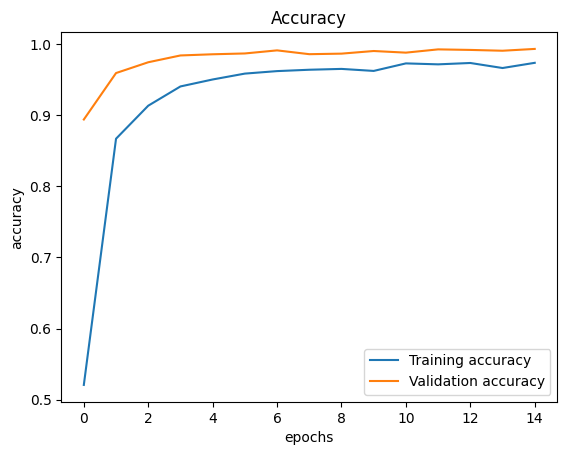

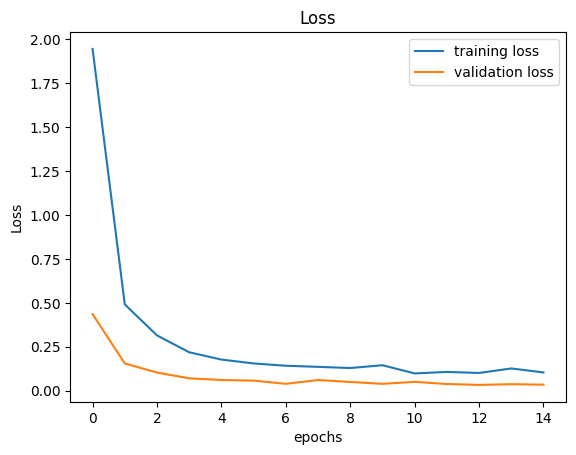

In [20]:
# plot accuracy and loss graph
plt.figure(0)
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.figure(1)
plt.plot(history.history['loss'], label="training loss")
plt.plot(history.history['val_loss'], label="validation loss")
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
imgs_path = "gtsrb-german-traffic-sign/Train"
data = []
labels = []
classes = 43
for i in range(classes):
    img_path = os.path.join(imgs_path, str(i)) #0-42
    for img in os.listdir(img_path):
        im = Image.open(img_path + '/' + img)
        im = im.resize((30,30))
        im = np.array(im)
        data.append(im)
        labels.append(i)
data = np.array(data)
labels = np.array(labels)

In [58]:
# test the model
from sklearn.metrics import accuracy_score

test = pd.read_csv("gtsrb-german-traffic-sign/Test.csv")
test_labels = np.array(test['ClassId'].values)
test_img_path = "gtsrb-german-traffic-sign/"
test_imgs = test['Path'].values
test_data = []
for img in test_imgs:
    im = Image.open(test_img_path + '/' + img)
    im = im.resize((30,30))
    im = np.array(im)
    test_data.append(im)
test_data = np.array(test_data)

In [48]:
test_data.shape

(12630, 30, 30, 3)

In [49]:
test_labels.shape

(12630,)

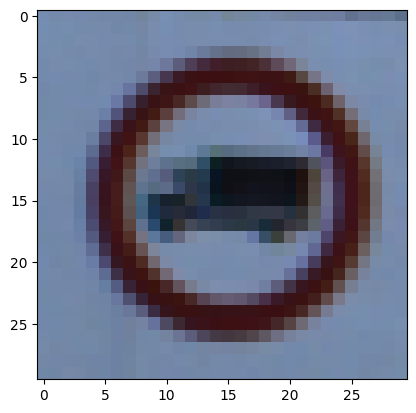

In [50]:
img = Image.open('gtsrb-german-traffic-sign/Test/00000.png')
img = img.resize((30, 30))
sr = np.array(img) 
plt.imshow(img)
plt.show()

In [59]:
predictions = model.predict(test_data).argmax(axis=1) 
print("accuracy: ", accuracy_score(test_labels, predictions))

395/395 [==============================] - 4s 9ms/step
accuracy:  0.9680918448139351


Argmax is done after the prediction because the inputs of the function should be 1d-array.

In [61]:
df = pd.DataFrame()
df['Predictions']  = predictions
df['Test Labels'] = test_labels

In [63]:
df.head(20)

,Predictions,Test Labels
0,16,16
1,1,1
2,38,38
3,33,33
4,11,11
5,38,38
6,18,18
7,12,12
8,25,25
9,35,35


In [64]:
# save the model for future use
model.save('traffic_classifier.h5')